In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('imbalanced_ratio_dataset3.csv')
df

,Review,Rating
0,I do love this shirt. It's very flattering and...,4.0
1,I just received this today. I found the fit to...,5.0
2,These are NOT Wrangler Willow jeans. These are...,2.0
3,"Great fabric, soft, and 100% giftable!",4.0
4,I have been looking for a long jacket with per...,5.0
...,...,...
17115,I really like these. they're not too distresse...,4.0
17116,This rich color is so flattering! i also love...,4.0
17117,Definitely pj quality. i have a fairly thin fr...,3.0
17118,"After only 5 months, these jeans have started ...",1.0


In [5]:
df.isnull().any()

Review    False
Rating    False
dtype: bool

In [6]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 3481


In [7]:
# Shuffle the balanced DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
df

,Review,Rating
0,I really feel in love with the details of thes...,4.0
1,Despite other reviewers comments on size - i r...,3.0
2,Just felt cheaply made. Bought a large and had...,3.0
3,I love this tank! its something you can dress ...,5.0
4,I loved these pants.they are so comfortable. h...,3.0
...,...,...
17115,This is a cute dress. the quality is very good...,5.0
17116,This is a beautiful sweater that i wanted to l...,3.0
17117,This shirt was strange. the bow tie was too th...,3.0
17118,Color on picture didn’t look like color sent. ...,1.0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=df['Review']
y=df['Rating']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
#removing punctuations and making lower case
X_train = X_train.str.lower()
X_train = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [13]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [14]:
X_train=X_train.apply(clean_text)

In [15]:
X_train

1687     the dress is very pretty i ordered for a weddi...
3584     i ordered size large in the denim color and to...
10608    i really was looking forward to this piece but...
3845     the color and quality are fantastic the shirt ...
5482     i hated this purchase because the dress was hu...
                               ...                        
16555              zipper is for womans garment wrong side
13875                                 returned immediately
6509     i love these pajamas they are soft i love the ...
6755     it doesnt work with me only because i have ver...
15347    i followed the fit size and it worked out grea...
Name: Review, Length: 13696, dtype: object

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [17]:
#lemmatization and stop word removal
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [18]:
X_train=X_train.apply(cleaning)

In [19]:
#removing punctuations and making lower case
X_test = X_test.str.lower()
X_test = X_test.str.replace(r'\[.*?\]', '', regex=True)


In [20]:
X_test=X_test.apply(clean_text)

In [21]:
X_test=X_test.apply(cleaning)

In [22]:
train_df = pd.DataFrame({'Review': X_train, 'Rating': y_train})
test_df = pd.DataFrame({'Review': X_test, 'Rating': y_test})

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, 16039 to 10230
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  3424 non-null   object 
 1   Rating  3424 non-null   float64
dtypes: float64(1), object(1)
memory usage: 80.2+ KB


In [24]:
#Filter out reviews with: Fewer than 3 words and Excessively long text

train_df['Word_Count'] = train_df['Review'].astype(str).apply(lambda x: len(x.split()))
train_df = train_df[(train_df['Word_Count'] >= 3) & (train_df['Word_Count'] <= 100)]


X_train = train_df['Review']
y_train = train_df['Rating']

In [25]:
#Filter out reviews with: Fewer than 3 words and Excessively long text
test_df['Word_Count'] = test_df['Review'].astype(str).apply(lambda x: len(x.split()))
test_df = test_df[(test_df['Word_Count'] >= 3) & (test_df['Word_Count'] <= 100)]


X_test = test_df['Review']
y_test = test_df['Rating']

In [26]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [27]:
# TF-IDF Vectorization
tv = TfidfVectorizer()
Xtrain_vec = tv.fit_transform(X_train)
Xtest_vec = tv.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

 Logistic Regression:
Accuracy: 0.550561797752809
Classification Report:
               precision    recall  f1-score   support

         1.0       0.61      0.38      0.47       323
         2.0       0.62      0.48      0.54       490
         3.0       0.53      0.62      0.57       832
         4.0       0.50      0.58      0.54       994
         5.0       0.62      0.55      0.58       654

    accuracy                           0.55      3293
   macro avg       0.58      0.52      0.54      3293
weighted avg       0.56      0.55      0.55      3293



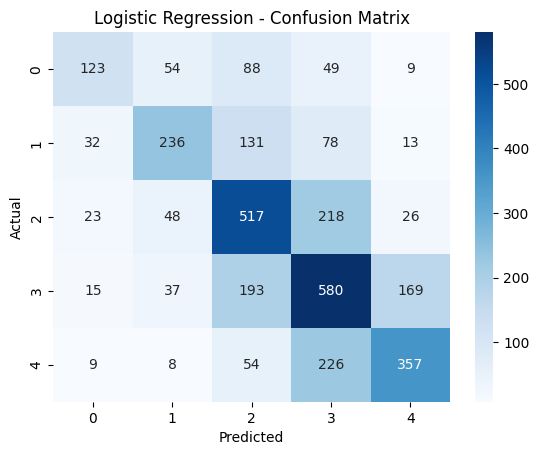

In [29]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain_vec, y_train)

# Predict
y_pred_lr = lr.predict(Xtest_vec)

# Evaluation
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
new_review = ["great dress"]

# Preprocess and vectorize the new review
new_vec = tv.transform(new_review)

# Predict
predicted_rating = lr.predict(new_vec)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.0


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l1', 'l2'],               # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga']        # Compatible solvers
}

# Create base model
lr = LogisticRegression(max_iter=1000)

# Grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain_vec, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_lr = grid_search.best_estimator_

# Predict using best model
y_pred = best_lr.predict(Xtest_vec)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("✅ Accuracy after tuning:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
✅ Accuracy after tuning: 0.6049195262678408

📋 Classification Report:
               precision    recall  f1-score   support

         1.0       0.53      0.41      0.46       323
         2.0       0.69      0.78      0.73       490
         3.0       0.62      0.72      0.67       832
         4.0       0.56      0.54      0.55       994
         5.0       0.60      0.53      0.56       654

    accuracy                           0.60      3293
   macro avg       0.60      0.60      0.59      3293
weighted avg       0.60      0.60      0.60      3293



C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
